<a href="https://colab.research.google.com/github/TurgutOzkan/DataSciencity/blob/master/Convolutional_Neural_Networks_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Convolutional Neural Network (CNN) is a type of deep learning method that specifically designed for analyzing images. In a typical artificial neural network, neurons are all connected to each other, whereas CNN utilizes smaller and simpler patterns to assemble more complex patterns by using shared weight, unlike an ANN where we have weights for each neuron. ANNs can ignore the spatial structure of data by treating input pixels that are far away from each other in the same way as pixels that are in the same locality. This is why CNNs offer a computationally feasible and more effective solution for image data. 

As the convolution happens, the image size gets smaller and smaller and the features are increasing (the model picks up larger shapes after picking up edges, strokes, or lines initially). Therefore, in order to keep the flow of information constant as the image size shrinks, the number of features increases. This will help us to regulate constant the amount of information passing from one layer to the next.

 In CNN, we use convolutions, which can be seen as "filters or kernels" applied to images. The information volume in the image is reduced by filters (or convolutions). This reduction can be blurring an image or highlighting the edges. Therefore, convolutions are information reducing transformations. Through this transformation, the image is reduced to features, which will identify outcomes as the output. This reduction is done by filters (the vector of weights and the bias), which represent certain features of the input (e.g., eyebrows or nose, etc.). A filter should have the same number of channels as the input. This is also called depth. Finally, the filtering or the convolution operation is an element by element multiplication and summing of all of these products. Below the resulting image (named as Filtered Image) is a feature map. It is like a map for the detected signal.



**Figure 1**

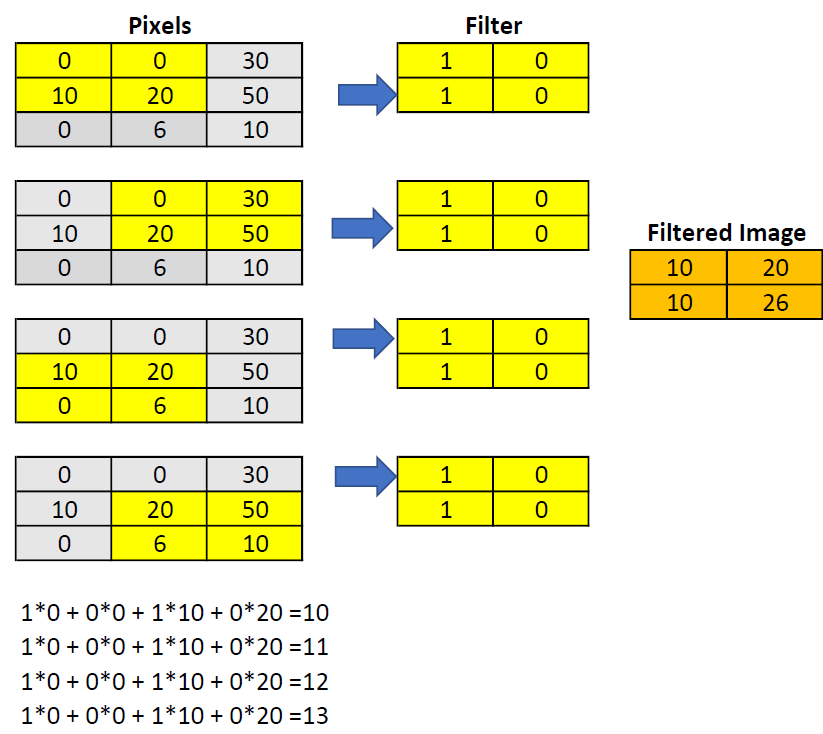

When a filter applied to an input image, the output length can be calculated as such:

<center> <h2> Length of output = Length of input - Length of filter + 1 </h2>  </center>

For example in Figure 1, 3X3 input and 2X2 filter, so 3 - 2  +1 = 2 would be the length of the output, and we got a 2X2 output in the end. This is called "valid" mode when coding. Sometimes, we want the same size output as our inputs. In this case, we use "Same" mode. This pads our image with zeroes around the image. Finally, there is the "Full" mode, which uses additional padding but it is not used that much. 

Pooling is also a concentration process within the image. In Figure 2, we show a 2 by 2 pools. The areas with the same color will be our pools, and we can shrink those areas by applying operations such as max() or avg(). In this case, the upper left yellow pool will reduce to 20 in max() pooling since 20 is the maximum value among 0,0,10, and 20. Whereas it reduces to roughly 7 since (0+0+10+20)/4 = 7.5.

Therefore, convolution or filtering operation is an element by element multiplication and summing, whereas pooling is reducing the image by predefined procedure such as taking the maximum or the average etc.

**Figure 2**

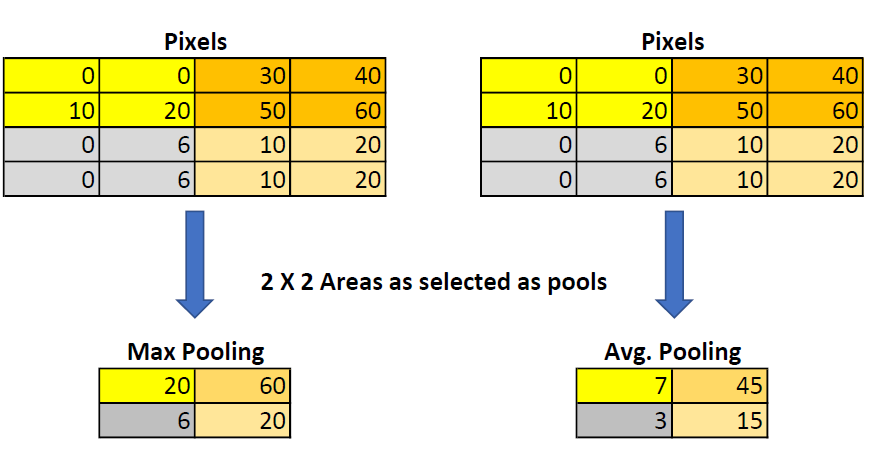

In Figure 3, the entire operation is represented. The image is the input, then convolution operation creates first feature maps, which are pooled into a reduced form. Next, the same operations continue until we have a flat input for our fully connected neural network to predict the outcome.

**Figure 3**

[Source](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)
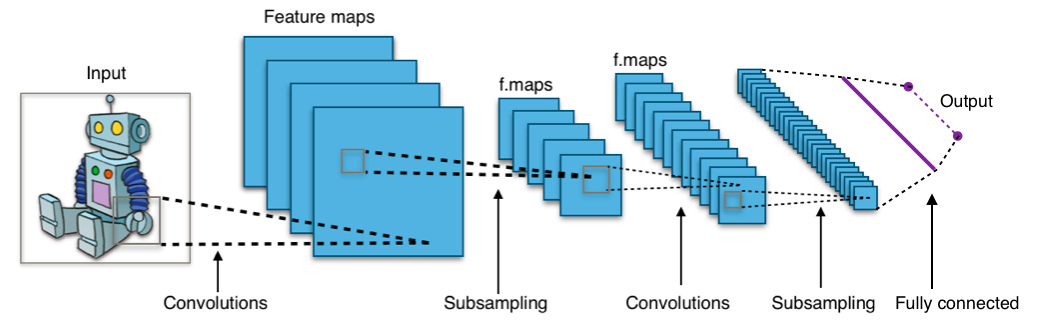




**Image Classification With Simple Neural Network**

We will first use an artificial neural network to predict the type of fashion item first. Then, we will apply CNN to highlight the differences in implementation. The Fashion MNIST data is hosted within Tensorflow so you can directly use it. Below, we will use the sequential API.

In [4]:
import tensorflow as tf
import numpy as np
data = tf.keras.datasets.fashion_mnist
(x_train, training_labels), (test_images, test_labels) = data.load_data()
x_train = x_train / 255.0 # so every pixel is represented by a number between 0 and 1. This process is called normalizing the image
test_images = test_images / 255.0
print (x_train.shape) 
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(32, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # since we have 10 categorical outcomes, we use sparse_categorical_crossentropy
model.fit(x_train, training_labels, epochs=10)

(60000, 28, 28)
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5409 - accuracy: 0.8138
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4101 - accuracy: 0.8544
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8635
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3549 - accuracy: 0.8725
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3385 - accuracy: 0.8776
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3265 - accuracy: 0.8801
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3156 - accuracy: 0.8850
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3063 - accuracy: 0.8885
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2986 - accuracy: 0.8903
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/st

In [6]:
print("Evaluate Test Data")
model.evaluate(test_images, test_labels)
result = model.predict(test_images) #The values of the 10 output neurons.
print(result[0]) # these are probabilities and the largest one is our predicted category.
print(test_labels[0])

Evaluate Test Data
313/313 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8677
[3.6458228e-08 1.2596767e-08 4.1316977e-09 1.1928717e-09 1.0386855e-07
 4.4328133e-03 1.2024803e-08 5.1158527e-03 3.5735713e-06 9.9044764e-01]
9


Our training accuracy is 0.89 and our test performance is 0.86 according to the results.

**CNN in Tensorflow**

In Tensorflow, CNN expects Sample Size X Height X Width X Color. A convolutional layer reduces the image to a feature map, with shape (number of images) x (feature map height) x (feature map width) x (feature map channels). 

A signal that varies with time is expressed using Conv1D. Speech and simple time series data for example is analyzed using Conv1D layers. If there are three dimensions, we use Conv3D. For example, videos have height, width, and time.

A typical convolution layer is defined in Figure 4.

**Figure 4**

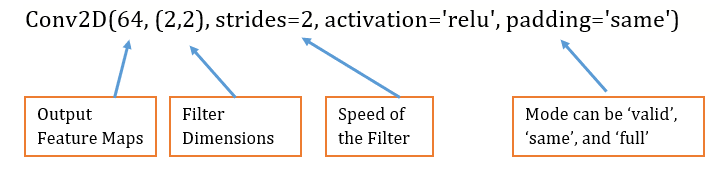

**Applying Convolutional Neural Network**

In [7]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist
(x_train, training_labels), (test_images, test_labels) = data.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) # Conv2D requires the third dimension due to color. For gray it is 1, for color, it is 3.
x_train = x_train / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', # we want the layer to learn 64 convolutions after randomly initializing filter values (3 by 3 size)
input_shape=(28, 28, 1)), 
tf.keras.layers.MaxPooling2D(2, 2), # split the image into 2 × 2 pools and picked the maximum value in each
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(), # after convolutions and pooling, the data will be flattened.
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train, training_labels, epochs=10)

print("Evaluating the Test Data")
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4402 - accuracy: 0.8392
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2959 - accuracy: 0.8922
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2498 - accuracy: 0.9070
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2183 - accuracy: 0.9189
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1902 - accuracy: 0.9290
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1680 - accuracy: 0.9367
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1447 - accuracy: 0.9457
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1288 - accuracy: 0.9516
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1149 - accuracy: 0.9560
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.099

We got better result. There is also some overfitting so there is room for improvement for sure. Next, we will get model summary, which provides information on our network.

In [8]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

Let's discuss the summary table in detail.

**(None, 26, 26, 64):** 64 filters are applied to 28 × 28 images and our filter is 3 × 3. Due to the lenght reduction mentioned above (input length (28) - filter length(3) +1 ), it came out as 26 × 26 pixels as a result of the first convolution layer. Each convolution is a 3 × 3 filter, plus a bias making it 10 in total.Therefore 64 convolutions *10 = 640 parameters.

**(None, 13, 13, 64):** The pooling layer (2 × 2) halves the size of the image on each axis and making it 13 × 13. No parameters learned (0).

**(None, 11, 11, 64):** The next convolutional layer  reduce this to 11 × 11. The 64 filters are multiplied across the previous 64 filters, each with 9 parameters. Since each one has a bias, so we add 64 additionally--(64 × (64 × 9)) + 64 = 36,928 parameters.

**(None, 5, 5, 64):** The next pooling will reduce it to 5 × 5.No parameters learned (0).

**(None, 1600):** We have 64 images that are 5 × 5, so 1,600 values.

**(None, 128): ** We’ll feed 1600 values into a dense layer of 128 neurons. with each having a weight and a bias ((5 × 5 × 64) × 128) + 128 = 204,928 parameters.

**(None, 10):** The final dense layer of 10 neurons takes in the output of the previous 128, so (128 × 10) + 10= 1,290 parameters.

**Using Functional API**

Now we will build an alternative model with functional API. We will use small numbers in layers and use some dropout for regularization. 

x_train.shape: (60000, 28, 28)
Reshaping the data for CNN!
(60000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6668 - accuracy: 0.7529 - val_loss: 0.4767 - val_accuracy: 0.8167
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4826 - accuracy: 0.8205 - val_loss: 0.4383 - val_accuracy: 0.8378
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4394 - accuracy: 0.8353 - val_loss: 0.4027 - val_accuracy: 0.8461
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4122 - accuracy: 0.8472 - val_loss: 0.3944 - val_accuracy: 0.8508
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3923 - accuracy: 0.8521 - val_loss: 0.3744 - val_accuracy: 0.8578
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8583 - val_loss: 0.3678 - val_accuracy: 0.8617
Epoch 7/10
1875/1875 [==============================] - 5s

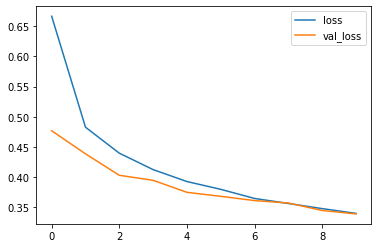

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print ("Reshaping the data for CNN!")
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

K = len(set(y_train)) # number of output
# Using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(8, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(16, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()
# see where the model makes mistakes
y_hat = model.predict(x_test).argmax(axis=1)
confusionMatrix = confusion_matrix(y_test, y_hat)
print(confusionMatrix)

Checking the confusion matrix will let you see where your model is making the most mistakes. True labels are on the y-axis and predicted ones are on the x-axis. The diagonal numbers give you correct predictions and off-diagonals show mistakes done by the model. For example, 148 cases are misclassified as label 0 when in fact it is label 6. Similarly, you can check other problem areas to identify issues and fix your model. In closing, sequential or functional API is a choice for you to build your model. Functional API generally offers more flexibility. Lastly, below are some quick bullet point notes for CNN.

**Some Takeaways:**
* Convolution (filtering) allows us to reveal patterns and pooling emhasizes those characteristics. For instance, we use filter to reveal vertical lines in an image and pooling will make those lines even more apparent.
* The activation function is commonly a ReLU layer (faster).
* Use increasing feature maps in convolutional layers (Con2D (16) -> Con2D (32) -> etc.)
* Typical pooling is set as 2X2. Larger pools may cause innformation loss because it reduces the dimension of the input. Pools are usually non-overlapping.
* The values in the filter are weights and they will be during the training.
* Each filter is a different pattern detector. When we say Conv(64...etc), we define 64 alternative pattern detector, which are going to pick up different things in the image.
* The filters' values are initialized randomly.
* Pick odd number of filters, such as 3X3, 5X5, or 7X7 etc.

**References**

https://en.wikipedia.org/wiki/Convolutional_neural_network

https://www.deeplearningbook.org/